<a href="https://colab.research.google.com/github/vamsikrishnamohan/DA-LAB-assignments/blob/main/Basics_of_Image_Processing_Tutorial_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### This exercise aims to make you comfortable with the basic image processing tools and libraries. This exercise will serve as a starting point before you dive deep into the course.

### Let's first import basic image processing or related libraries.

In [1]:
import numpy as np                 # numpy library useful for most of the mathematical operations
import matplotlib.pyplot as plt    # useful for data visualization/plotting purpose. Can also be used for image visualization.

# For this exercise, we will restrict ourselves to matplotlib only. Please note that other libraries such as PIL, OpenCV
# can also be used as image processing libraries.

### First load an image and visualize it.

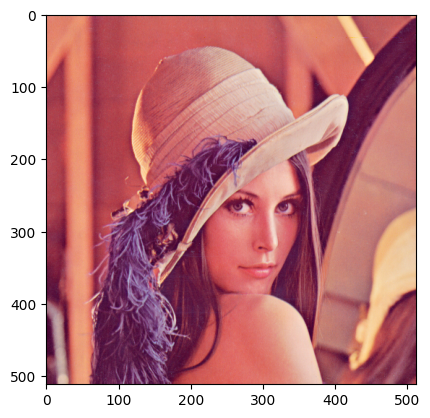

In [6]:
image = plt.imread("/lena.png")
plt.imshow(image)

# 1. Image Information

#### It is always good to know basic image details, such as its dimensions, before one proceeds for the experiments.

### Is this image RGB (no of channels?), gray or binary (intensity range?)? What can you say about aspect ratio (defined as width/height) of this image?

#### Task1.1 : write code to find image dimension and print it

In [7]:
image.shape

(512, 512, 3)

#### Task1.2:  Visualization of each channel

#### An RGB image can be decomposed into three channels, Red(R), Green(G), Blue(B). In this subsection, let's visualize each channel separately.

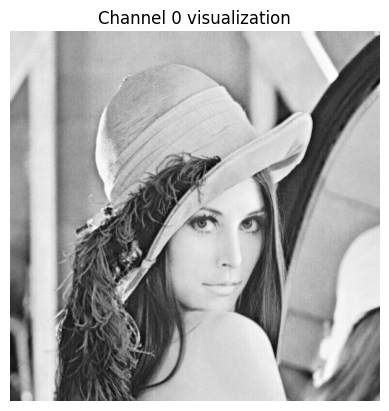

[[0.8862745  0.8862745  0.8745098  ... 0.9019608  0.8666667  0.78431374]
 [0.8862745  0.8862745  0.8745098  ... 0.9019608  0.8666667  0.78431374]
 [0.8862745  0.8862745  0.8745098  ... 0.9019608  0.8666667  0.78431374]
 ...
 [0.32941177 0.32941177 0.36078432 ... 0.6784314  0.6745098  0.69411767]
 [0.32156864 0.32156864 0.3764706  ... 0.7019608  0.70980394 0.7254902 ]
 [0.32156864 0.32156864 0.3764706  ... 0.7019608  0.70980394 0.7254902 ]]


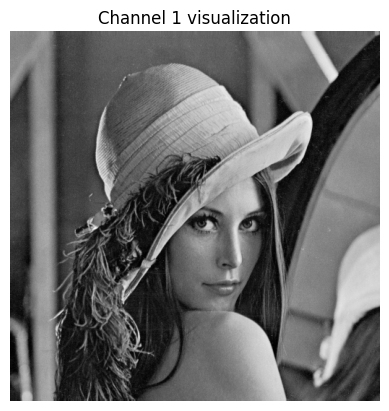

[[0.5372549  0.5372549  0.5372549  ... 0.5803922  0.50980395 0.3882353 ]
 [0.5372549  0.5372549  0.5372549  ... 0.5803922  0.50980395 0.3882353 ]
 [0.5372549  0.5372549  0.5372549  ... 0.5803922  0.50980395 0.3882353 ]
 ...
 [0.07058824 0.07058824 0.10588235 ... 0.28627452 0.26666668 0.24313726]
 [0.08627451 0.08627451 0.1254902  ... 0.27450982 0.2784314  0.2901961 ]
 [0.08627451 0.08627451 0.1254902  ... 0.27450982 0.2784314  0.2901961 ]]


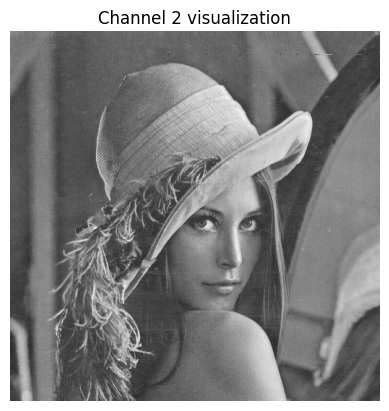

[[0.49019608 0.49019608 0.52156866 ... 0.47843137 0.43137255 0.3529412 ]
 [0.49019608 0.49019608 0.52156866 ... 0.47843137 0.43137255 0.3529412 ]
 [0.49019608 0.49019608 0.52156866 ... 0.47843137 0.43137255 0.3529412 ]
 ...
 [0.23529412 0.23529412 0.22745098 ... 0.32941177 0.29803923 0.30980393]
 [0.22352941 0.22352941 0.24313726 ... 0.30980393 0.31764707 0.31764707]
 [0.22352941 0.22352941 0.24313726 ... 0.30980393 0.31764707 0.31764707]]


In [15]:
def VisualizeChannel(image,channel):
    '''
    This function is helpful to visualize a specific channel of an RGB image.
    image: RGB image
    channel: channel, one wish to visualize (can take value 0 (for red), 1(green), 2(blue))
    '''
    #write your code here
    output = image[:, :, channel]

    plt.imshow(output, cmap='grey')
    plt.title(f'Channel {channel} visualization')
    plt.axis('off')
    plt.show()

    print(output)   # 'output' is image's particular channel values

red_channel = VisualizeChannel(image, 0)

green_channel = VisualizeChannel(image, 1)

blue_channel = VisualizeChannel(image, 2)

#### Can you also comment on the maximum and minimum intensity values of each channel? What can you say about the range of intensity values?

In [16]:
red_max, red_min = image[:, :, 0].max(), image[:, :, 0].min()
green_max, green_min = image[:, :, 1].max(), image[:, :, 1].min()
blue_max, blue_min = image[:, :, 2].max(), image[:, :, 2].min()

print("Red Channel: Max =", red_max, ", Min =", red_min)
print("Green Channel: Max =", green_max, ", Min =", green_min)
print("Blue Channel: Max =", blue_max, ", Min =", blue_min)

Red Channel: Max = 1.0 , Min = 0.21176471
Green Channel: Max = 0.972549 , Min = 0.011764706
Blue Channel: Max = 0.88235295 , Min = 0.03137255


# 2. Intensity Manipulations

#### Task2.1: RGB to Gray  

#### We may need a gray image for some of our applications. One can also convert RGB to gray to reduce computational complexity. For this part, we will convert an RGB image to grayscale. Refer this link for explanation:  https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm

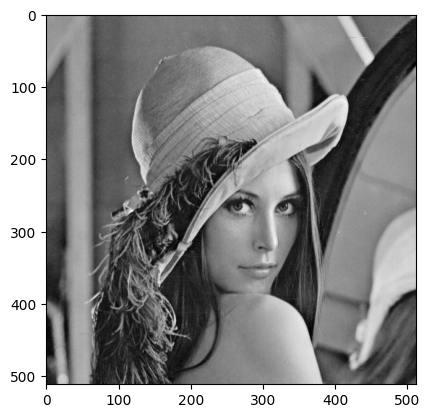

In [28]:
def RGB2Gray(image):
    '''
    This function converts an RGB image to grayscale
    image: RGB image
    '''
    #write you code here and visualize the result
    gray = np.dot(image[..., :3], [0.33, 0.33, 0.33]) ## cross product of image and weight vector of 3 colors [1/3,1/3,1/3]
    plt.imshow(gray, cmap='gray')

    return gray       #'gray' is grayscale image, converted from RGB image

gray_image=RGB2Gray(image)

We can also convert a gray image to a binary image. For task2.2, consider a gray image as input (you may take the output from task2.1 as input).

$$
I(x, y) =
\begin{cases}
1 & \text{if } I(x, y) \geq T \\
0 & \text{if } I(x, y) < T & \text{where T is threshold}
\end{cases}
$$

Though there are proper methods (such as the Otsu method) to find a suitable $T$, we will not go into details of those algorithms and randomly select T values and visualize the result.

#### Task2.2 : Gray to Binary

##### Before you proceed to code, Can you comment on the valid range of T? (Hint: Task1.2)

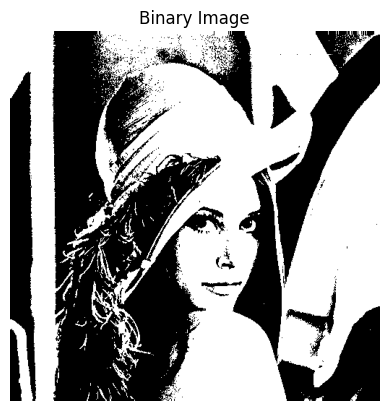

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
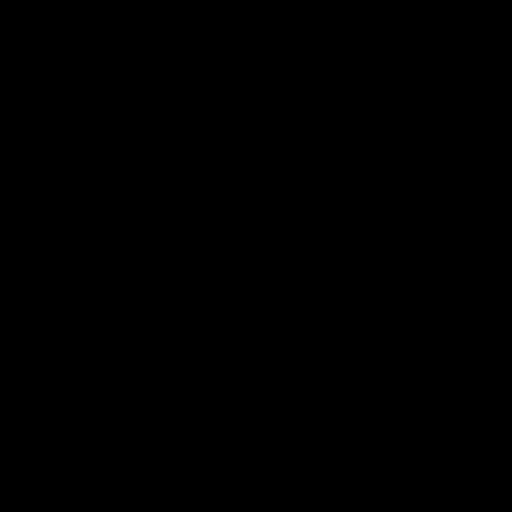

In [41]:
def Gray2Binary(image,T):
    '''
    This function converts a gray image to binary based on the rule stated above.
    image: image (can be RGB or gray); if the image is RGB, convert it to gray first
    T: Threshold
    '''

    #check if image is RGB if yes, convert it to gray
    flag = len(image.shape)
    if flag == 3:        #i.e. RGB image, hence to be converted to gray
        # write code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
        image =RGB2Gray(image)

    #Write code to threshold image based on the rule stated above and return this binarized image (say it 'bimage')
    bimage = (image >= T).astype(np.uint8) # converting boolean array to binary array

    #write code to visualize the resultant image
    plt.imshow(bimage ,cmap='grey')
    plt.title("Binary Image")
    plt.axis('off')  # Hide axes
    plt.show()

    return bimage

Gray2Binary(gray_image,0.5)

An image is nothing but a matrix. Hence one can perform all kinds of mathematical operations on an image just like a matrix.

To convince ourselves with the above statement, let's crop a section of a gray image, print its value, and perform some mathematical operations. For a better data display, we will cut only 5*5 areas of the gray image.

####  Task2.3:  Crop a 5*5 section of a gray image

In [42]:
def ImageCrop(image,r0,c0):
    '''
    This function crops 5*5 rectangular patch defined by image coordinates(r0,c0),(r0,c0+5),(r0+5,c0) and (r0+5,c0+5)
    of an image.
    image: Image can be RGB or gray
    r0: starting row index
    c0: starting column index
    '''
    # write code to check if input is RGB , if its RGB convert it to gray
    flag = len(image.shape)
    if flag==3:
      image=RGB2Gray(image)

    # write code to select 5*5 rectangular patch defined as above (say it 'patch')
    patch = image[r0:r0+5, c0:c0+5]


    # visualize patch and print its value
    plt.imshow(patch,cmap='gray')
    plt.title("Cropped Image")
    plt.axis('off')  # Hide axes
    plt.show()
    print(patch)

    return patch


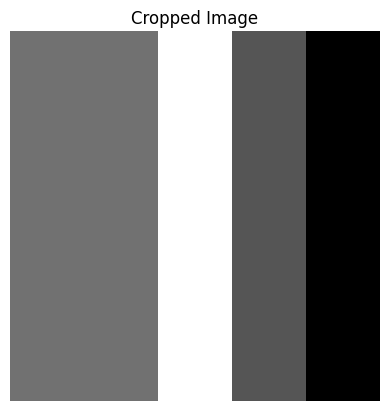

[[0.63152942 0.63152942 0.63800002 0.63023532 0.62635295]
 [0.63152942 0.63152942 0.63800002 0.63023532 0.62635295]
 [0.63152942 0.63152942 0.63800002 0.63023532 0.62635295]
 [0.63152942 0.63152942 0.63800002 0.63023532 0.62635295]
 [0.63152942 0.63152942 0.63800002 0.63023532 0.62635295]]
[[0.63152942 0.63152942 0.63800002 0.63023532 0.62635295]
 [0.63152942 0.63152942 0.63800002 0.63023532 0.62635295]
 [0.63152942 0.63152942 0.63800002 0.63023532 0.62635295]
 [0.63152942 0.63152942 0.63800002 0.63023532 0.62635295]
 [0.63152942 0.63152942 0.63800002 0.63023532 0.62635295]]


In [45]:
patch = ImageCrop(gray_image,0,0)
print(patch)


Now you have 5*5 patch and you know its values too. Can you try


1. multiplying patch by 0.5
2. multiplying patch by 2
3. create another random 5*5 patch (numpy array) and add/subtract it to the patch

Does it follow matrix addition/subtraction and multiplication rules? You can also play around with other matrix operations.

#### Task2.4: Uniform Brightness Scaling

Hopefully, you are convinced that an image is a matrix.

Hence we can perform multiplication/division or addition/subtraction operations.

These operations will change the brightness value of the image; can make an image brighter or darker depending on the multiplying/scaling factor.

For this task, let's change the image brightness uniformly. Consider scale to be 0.3,0.5,1,2 for four different cases. What is your observation?

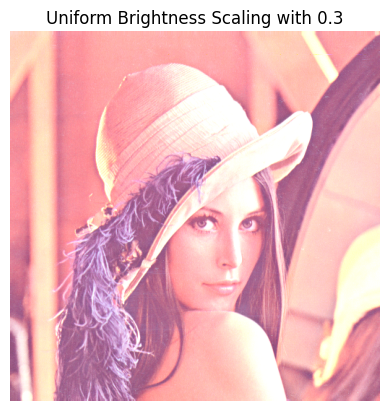

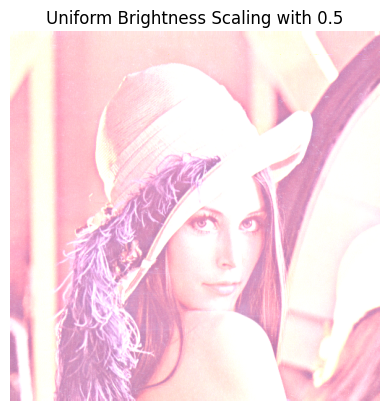

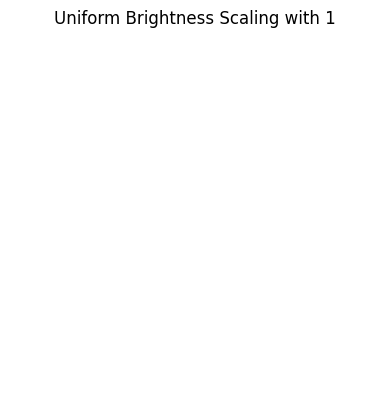

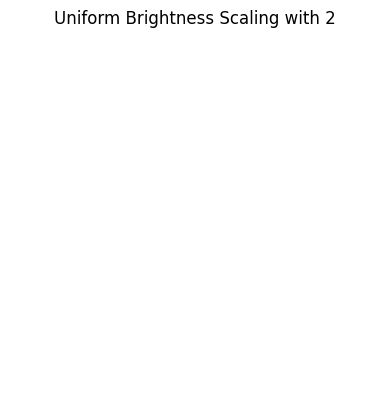

In [55]:
def UniformBrightScaling(image,scale):
    '''
    This function uniformly increases or decreases the pixel values (of all image locations) by a factor 'scale'.
    image: image (can be RGB or gray image)
    scale: A scalar by which pixels'svalues need to be multiplied
    '''
    #write your code here
    image=image[:,:]+scale


    #display the resultant image
    plt.imshow(image,cmap='grey')
    plt.title(f"Uniform Brightness Scaling with {scale}")
    plt.axis('off')  # Hide axes
    plt.show()


    #return output        #replace output with the variable name you used for final result
scale=[0.3,0.5,1,2]

for i in scale:
  UniformBrightScaling(image,i)

In [ ]:
## Image normalization

# 3. Image Filtering

In this section, you will perform some of the image filtering techniques.

Convolution is one of the most widely used operations for images.

Convolution can be used as a feature extractor; different kernel results in various types of features.


Refer https://en.wikipedia.org/wiki/Kernel_(image_processing) to see few examples of kernel.


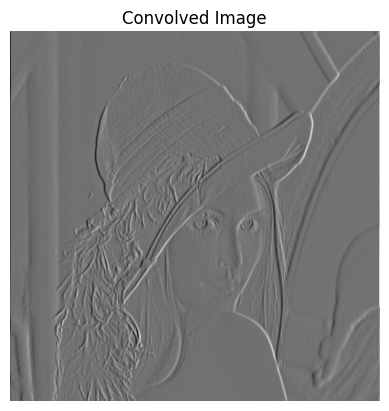

array([[-1.27249415e+00, -1.17653847e-04,  8.95685542e-03, ...,
         1.29584306e-01,  3.24556878e-01,  1.21512945e+00],
       [-1.90874123e+00, -1.76480770e-04,  1.34352831e-02, ...,
         1.94376459e-01,  4.86835318e-01,  1.82269418e+00],
       [-1.90874123e+00, -1.76480770e-04,  1.34352831e-02, ...,
         1.94376459e-01,  4.86835318e-01,  1.82269418e+00],
       ...,
       [-5.19635308e-01, -8.46039209e-02, -6.09607824e-02, ...,
        -9.67843080e-03,  3.00078588e-02,  1.18736867e+00],
       [-5.11301975e-01, -1.12545100e-01, -7.44548975e-02, ...,
        -3.68941154e-02, -1.14078337e-02,  1.21595298e+00],
       [-3.44549029e-01, -8.33411803e-02, -5.78901926e-02, ...,
        -3.59764684e-02, -3.42745078e-02,  8.23764734e-01]])

In [63]:


def feature_extractor(image, kernel):
    '''
    This function performs convolution operation to a gray image using a given kernel.
    image: image (can be RGB or gray); if RGB convert it to gray
    kernel: 3*3 convolution kernel
    '''

    # Check if image is RGB, if yes, convert to gray
    if len(image.shape) == 3:  # RGB image, convert to gray
        image = RGB2Gray(image)

    # Initialize output array to store convolved values
    output = np.zeros_like(image)

    # Pad the image with zeros (2 pixels on each side)
    pad_img = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    pad_img[1:-1, 1:-1] = image

    # Perform convolution
    for row in range(image.shape[0]):  # Iterate over each row
        for col in range(image.shape[1]):  # Iterate over each column
            # Extract 3x3 patch centered at (row, col)
            patch = pad_img[row:row + 3, col:col + 3]

            # Convolve kernel with the patch (element-wise multiplication and sum)
            output[row, col] = np.sum(patch * kernel)

    plt.imshow(output, cmap='gray')
    plt.title('Convolved Image')
    plt.axis('off')
    plt.show()

    return output
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])
feature_extractor(image,kernel)

## Note that the steps described above are to help you get started. You can follow other valid steps too.
Result from all of the method should be the same. Pseudocode is available at: https://en.wikipedia.org/wiki/Kernel_(image_processing)

for the above case, consider all 3 * 3 kernels from https://en.wikipedia.org/wiki/Kernel_(image_processing).

What was your observation with different kernels?

You can also play with other kernels, take any 3*3 matrix of your choice, convolve it with a gray image and see if it extracts some image features.

(You should be able to correlate your learning from this experiment during CNN lectures)

# 4.Geometric Transformation

In all of the above cases, you performed operations on the pixel value, i.e., photometric transformations. Now for this section, you will apply the transformations on pixel locations, i.e., spatial transformations
It is advised to go through below mentioned references(in order) before proceeding to this section:
1. https://www.youtube.com/watch?v=7liGDs9Vf-I&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=6
2. https://www.youtube.com/watch?v=FleSNIZp2kc&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=8
3. https://www.youtube.com/watch?v=NYkMk17J9O0&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=9
4. https://www.youtube.com/playlist?list=PLfZZTc8qI7Hc7n4Y2xZcfPbsd5K6eMhPE (L09-L13)

#### Task4.1: Image Rotation (In-plane)

Write a function which rotates an image by 10 degrees in anticlockwise direction. (You can use inbuit functions for this, however it is encouraged to write code from scratch)

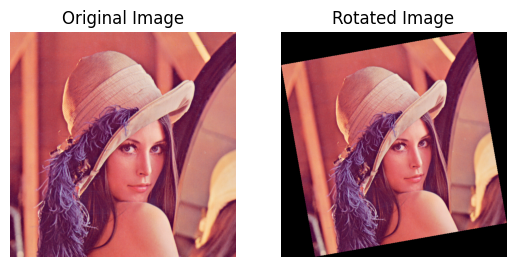

In [73]:
#image rotation by 10 degrees
from scipy.ndimage import rotate
def rotate_image(image, angle):
    rotated_image=rotate(image,angle)

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(rotated_image, cmap='gray')
    plt.title('Rotated Image')
    plt.axis('off')
    plt.show()

rotate_image(image,10)

